#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples

#### Due: 25/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

**Name**: Ofir Nesher

**Student ID**: 204502926

**Date**: 16/04/2022

$
\newcommand{\Id}{{\mathbf{I}}}
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$

<hr>
<hr>

## Problem 1 (Variance Estimation)

Consider the variance estimate
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n(y_i - \bar{y})^2. 
$$
If $Y_i \simiid \Ncal(\mu,\sigma^2)$, then 
$$
\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1}.
$$
1. Use this information to derive a $1-\alpha$ confidence interval for $\sigma^2$ (express $L$ and $U$ in terms of $s^2$, $n$, and the relevant quantiles of the $\chi^2$ distribution).
2. For $n = 2,\ldots,10$ and $\alpha=0.05$, report on the lower ($L$) and upper ($U$) values of the confidence interval in terms of $s^2$.
3. How large $n$ must be to obtain a $0.95$ confidence interval of size $0.1s^2$?

The point: the number of degrees of freedom needed for a reasonable ($10\%$ range) estimate of the variance can be very large. Sometimes, much larger than our data permits.

### **Answers**:

#### 1.
Denote $T = \frac{n-1}{\sigma^2}s^2$ --> $T \sim \chi^2_{n-1}$

Derive a $1-\alpha$ confidence interval for $\sigma^2$:

$$
(1-\alpha) = Pr(|T| < {\chi^2_{n-1}}^{(\frac{\alpha}{2})}) =
$$
$$
Pr({\chi^2_{n-1}}^{(1-\frac{\alpha}{2})} < T < {\chi^2_{n-1}}^{(\frac{\alpha}{2})}) = 
$$
$$
Pr({\chi^2_{n-1}}^{(1-\frac{\alpha}{2})} < \frac{n-1}{\sigma^2}s^2 < {\chi^2_{n-1}}^{(\frac{\alpha}{2})}) =
$$

getting the inverse:
$$
Pr(\frac{1}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}} > \frac{\sigma^2}{(n-1) s^2} > \frac{1}{{\chi^2_{n-1}}^{2}}) =
$$

arranging sides
$$
Pr(\frac{1}{{\chi^2_{n-1}}^{(\frac{\alpha}{2})}} < \frac{\sigma^2}{(n-1) s^2} < \frac{1}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}}) =
$$

$$
Pr(\frac{(n-1) s^2}{{\chi^2_{n-1}}^{(\frac{\alpha}{2})}} < \sigma^2 < \frac{(n-1) s^2}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}})
$$

Where $L=\frac{(n-1) s^2}{{\chi^2_{n-1}}^{(\frac{\alpha}{2})}}$ and $U=\frac{(n-1) s^2}{{\chi^2_{n-1}}^{(1-\frac{\alpha}{2})}}$

#### 2.
We need to plug each n into the distribution's `isf` and find $L$ & $U$.

In [99]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
# https://faculty.elgin.edu/dkernler/statistics/ch09/9-3.html#:~:text=a%20couple%20examples.-,Example%203,-Suppose%20a%20sample
import scipy.stats as stats

alpha = 0.05

for n in range(2, 11):
    degrees_of_freedom = n - 1
    L = degrees_of_freedom / stats.chi2.isf((alpha / 2), df=degrees_of_freedom)
    U = degrees_of_freedom / stats.chi2.isf(1 - (alpha / 2), df=degrees_of_freedom)
    print(f'n = {n}: L = {L} * s^2, U = {U} * s^2')

n = 2: L = 0.19904909520541283 * s^2, U = 1018.2582697196675 * s^2
n = 3: L = 0.2710850306818168 * s^2, U = 39.49789020520718 * s^2
n = 4: L = 0.3209104064096184 * s^2, U = 13.902064788082486 * s^2
n = 5: L = 0.3589605184087298 * s^2, U = 8.25732198214267 * s^2
n = 6: L = 0.3896356300841498 * s^2, U = 6.015315376822784 * s^2
n = 7: L = 0.41524286418669626 * s^2, U = 4.849095165237045 * s^2
n = 8: L = 0.4371512550828481 * s^2, U = 4.1423324835086754 * s^2
n = 9: L = 0.4562422053220663 * s^2, U = 3.670178075931288 * s^2
n = 10: L = 0.473117271643439 * s^2, U = 3.3328525385191514 * s^2


#### 3.


In [100]:
degrees_of_freedom = 1
U = 1
L = 0

while (U - L) > 0.1:
    degrees_of_freedom = degrees_of_freedom + 1
    L = degrees_of_freedom / stats.chi2.isf((alpha / 2), df=degrees_of_freedom)
    U = degrees_of_freedom / stats.chi2.isf(1 - (alpha / 2), df=degrees_of_freedom)

print(f'n = {degrees_of_freedom + 1}: U-L = {U - L}')
print(f'n must be {degrees_of_freedom + 1} to obtain a 0.95 confidence interval of size 0.1 s^2')

n = 3082: U-L = 0.09999344353459327
n must be 3082 to obtain a 0.95 confidence interval of size 0.1 s^2


---
## Problem 2 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but 
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arises when an observation $i$ may depend to some extent on only the previous observation’s white noise: a one-lag "holdeover effect". This is also known as the "lag-1 moving average" model (MA(1)).

1. Show that:
  - $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases variance. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \Ncal(0,I)$ and $\Sigma^{1/2}$ is symmetric with  $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance structure.

  - $$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$
  where $s^2$ is the standard variance estimate.
Namely, with positive correlation the "variety" in the data is smaller. 

  - **(Bonus)** The t-statistic satisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \Ncal(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV U_n and V_n, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $ V_n U_n \overset{D}{\to} cU$


2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `generate_correlated_data` below generates normally distributed data satisfying the correlation model above.


3. Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval 
 contains the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of samples size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.
 
 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $t$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Would your answer to the previous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong decisions. The effect of correlation is much worse than non-normality since the latter diminishes with $n$ due to the CLT.

In [101]:
import numpy as np


def generate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )
    
    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation
    """
    assert sigma > 0

    # build desired covariance matrix
    Sig = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                Sig[i, j] = 1
            if np.abs(i - j) == 1:
                Sig[i, j] = rho
                Sig[j, i] = rho

    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma ** 2 * Sig)

    # sample from the standard normal dist. and transform 
    # so that the result is a normal vector with the desired 
    # covariance structure
    return mu + Sig_sqrt @ np.random.randn(n)

### **Answers**:

#### 1a.
$\bar{Y} = \frac{1}{n}\sum_{i=1}^{n} Y_i$

Hence, $$\mathrm{Var}(\bar{Y}) = \mathrm{Var}(\frac{1}{n}\sum_{i=1}^{n} Y_i) = \frac{1}{n^2} \mathrm{Var}(\sum_{i=1}^{n} Y_i)$$

We expend the term $\mathrm{Var}(\sum_{i=1}^{n} Y_i)$:
$$\mathrm{Var}(\sum_{i=1}^{n} Y_i) =$$
$$\mathrm{Var}(Y_1 + Y_2 + \dots + Y_n) =$$
$$\mathrm{Var}(Y_1) + \mathrm{Var}(Y_2 + Y_3 + \dots + Y_n)  + 2 \mathrm{Cov}(Y_1, Y_2 + Y_3 + \dots + Y_n) =$$
$$\mathrm{Var}(Y_1) + \mathrm{Var}(Y_2) + \mathrm{Var}(Y_3 + Y_4 + \dots + Y_n) + 2 \mathrm{Cov}(Y_1, Y_2 + Y_3 + \dots + Y_n)  + 2 \mathrm{Cov}(Y_2, Y_3 + Y_4 + \dots + Y_n) =$$
$$\sum_{i=1}^{n} \mathrm{Var}(Y_i) + \sum_{i=1}^{n-1} [2 \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n)] =$$
$$\sum_{i=1}^{n} \mathrm{Var}(Y_i) + 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n)$$

LHS: $\sum_{i=1}^{n} \mathrm{Var}(Y_i) = n\sigma^2$

RHS: $2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n) = 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1})$ because "an observation $i$ may depend to some extent on only the previous observation’s white noise" (MA(1)).<br>
Also, $\mathrm{Cov}(Y_i, Y_{i+1}) = \mathrm{Corr}(Y_i, Y_{i+1}) \sigma_{Y_i} \sigma_{Y_{i+1}} = \rho \sigma \sigma = \rho \sigma^2$<br>
And so, RHS == $2 (n-1) \rho \sigma^2$

Putting it all together:
$$\mathrm{Var}(\bar{Y}) =$$
$$\frac{1}{n^2} \mathrm{Var}(\sum_{i=1}^{n} Y_i) =$$
$$\frac{1}{n^2} [\sum_{i=1}^{n} \mathrm{Var}(Y_i) + 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1} + Y_{i+2} \dots + Y_n)] =$$
$$\frac{1}{n^2} [n\sigma^2 + 2 \sum_{i=1}^{n-1} \mathrm{Cov}(Y_i, Y_{i+1}] =$$
$$\frac{1}{n^2} [n\sigma^2 + (n-1) 2 \rho \sigma^2] =$$
$$\frac{n \sigma^2}{n^2} + \frac{(n-1) 2 \rho \sigma^2}{n^2} =$$
$$\frac{\sigma^2}{n} + \frac{(n-1) 2 \rho \sigma^2}{n^2} =$$
$$\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$

#### 1b.
$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2$
$$\qquad \ex[{s^2}] = \ex[\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2] = \frac{1}{n-1} \ex[\sum_{i=1}^{n} (Y_i - \bar{Y})^2]$$

$\sigma^2(1 - 2\rho/n)$

#### 2.

In [102]:
nMonte = 10000
n = 10
std = 1
rho_list = [0.1, -0.1, 0.3, -0.3, 0.5, -0.5]

for rho in rho_list:
    instances = [generate_correlated_data(n=n, rho=rho, mu=0, sigma=std) for i in range(nMonte)]

    # bullet 1
    y_bar = [np.mean(x) for x in instances]
    var_y_bar_formula = (std ** 2 / n) * (1 + (2 * rho * (n - 1) / n))

    # bullet 2
    s = [np.sum(np.square(instances[i] - y_bar[i])) / (n - 1) for i in range(len(y_bar))]
    exp_s_squared_formula = std ** 2 * (1 - (2 * rho / n))

    print(f'rho = {rho}:\n\t'
          f'Var(Y-bar)         = {np.var(y_bar)}\n\t'
          f'Var(Y-bar) formula = {var_y_bar_formula}\n\t'
          f'E(s^2)             = {np.mean(s)}\n\t'
          f'E(s^2) formula     = {exp_s_squared_formula}\n')

rho = 0.1:
	Var(Y-bar)         = 0.12051479405189396
	Var(Y-bar) formula = 0.118
	E(s^2)             = 0.971730131796529
	E(s^2) formula     = 0.98

rho = -0.1:
	Var(Y-bar)         = 0.08132415964144328
	Var(Y-bar) formula = 0.08200000000000002
	E(s^2)             = 1.0197600582748059
	E(s^2) formula     = 1.02

rho = 0.3:
	Var(Y-bar)         = 0.15285629270144385
	Var(Y-bar) formula = 0.15400000000000003
	E(s^2)             = 0.9353395866357638
	E(s^2) formula     = 0.94

rho = -0.3:
	Var(Y-bar)         = 0.04537533253249224
	Var(Y-bar) formula = 0.04600000000000001
	E(s^2)             = 1.0582386854589887
	E(s^2) formula     = 1.06

rho = 0.5:
	Var(Y-bar)         = 0.18766102180648064
	Var(Y-bar) formula = 0.19
	E(s^2)             = 0.9029451047551811
	E(s^2) formula     = 0.9

rho = -0.5:
	Var(Y-bar)         = 0.010039892171199128
	Var(Y-bar) formula = 0.009999999999999998
	E(s^2)             = 1.0927235686066734
	E(s^2) formula     = 1.1



#### 3.
Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval
 contains the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of samples size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.

 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $t$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of samples size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$.

 - Would your answer to the previous two items change if $\rho < 0$? how?

#### 3a.
Denote $T = \sqrt{n} \frac{\bar{Y} - \mu}{s}$ --> $T \sim t_{n-1}$

Derive a $1-\alpha$ confidence interval for $s^2$:

$$
(1-\alpha) = Pr(|T| < {t_{n-1}}^{(\frac{\alpha}{2})}) =
$$
$$
Pr({t_{n-1}}^{(1-\frac{\alpha}{2})} < T < {t_{n-1}}^{(\frac{\alpha}{2})}) =
$$
$$
Pr({t_{n-1}}^{(1-\frac{\alpha}{2})} < \sqrt{n} \frac{\bar{Y} - \mu}{s} < {t_{n-1}}^{(\frac{\alpha}{2})}) =
$$

getting the inverse:
$$
Pr(\frac{1}{{t_{n-1}}^{(1-\frac{\alpha}{2})}} > \frac{s}{\sqrt{n} (\bar{Y} - \mu)} > \frac{1}{{t_{n-1}}^{(\frac{\alpha}{2})}}) =
$$

arranging sides
$$
Pr(\frac{1}{{t_{n-1}}^{(\frac{\alpha}{2})}} < \frac{s}{\sqrt{n} (\bar{Y} - \mu)} < \frac{1}{{t_{n-1}}^{(1 - \frac{\alpha}{2})}}) =
$$

$$
Pr(\frac{\sqrt{n} (\bar{Y} - \mu)}{{t_{n-1}}^{(\frac{\alpha}{2})}} < s < \frac{\sqrt{n} (\bar{Y} - \mu)}{{t_{n-1}}^{(1 - \frac{\alpha}{2})}})
$$

Where $L=\frac{\sqrt{n} (\bar{Y} - \mu)}{{t_{n-1}}^{(\frac{\alpha}{2})}}$ and $U=\frac{\sqrt{n} (\bar{Y} - \mu)}{{t_{n-1}}^{(1 - \frac{\alpha}{2})}}
$

In [117]:
nMonte = 10000
n = 100
alpha = 0.05
rho = 0.25
std = 1
mu = 2

instances = [generate_correlated_data(n=n, rho=rho, mu=mu, sigma=std) for i in range(nMonte)]
y_bar = np.mean(instances)
numerator = np.sqrt(n) * (y_bar - mu)
L = numerator / (stats.t.isf((alpha / 2), df=n - 1))
U = numerator / (stats.t.isf(1 - (alpha / 2), df=n - 1))
print(f'L = {L}')
print(f'U = {U}')

L = -0.00636476359553178
U = 0.006364763595531781


#### 3b.
"$t$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$":
$$
1 - Pr(\frac{\sqrt{n} (\bar{Y} - \mu)}{{t_{n-1}}^{(\frac{\alpha}{2})}} < s < \frac{\sqrt{n} (\bar{Y} - \mu)}{{t_{n-1}}^{(1 - \frac{\alpha}{2})}})
$$

#### 3c.
My answer to the previous two items would change if $\rho < 0$ .................

---
## Problem 3 (Regression and Hypothesis Testing)

The dataset for this problem is available in the file temp_TLV_beach.csv, which was taken directly from the meteorological service website (https://ims.data.gov.il/ims/1).

We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area. 
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n. 
\label{eq:model} \tag{2}
$$
(note that the dataset does not contain measurements from all days in the range)

1) Set $y_t = \texttt{Rainfall}$. 
 - Plot $y_t$ versus $t=$`Date` and identify winter times.

- Find the LS regression coefficients $\beta$; plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$. 

 - Test whether the fitted model significantly improves on the trivial model $y_t = \beta'_0 + \epsilon_t$.
 
 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is 
significantly different than $0$ at level $\alpha = 0.01$. 
(for this item, you can either evaluate everything from the formulas provided in class or use a statistical package like `statsmodels`)

You may use the code below to format the `Date` column correctly and extract other relevant information from it. 

In [118]:
import pandas as pd

path_to_data_file = "rainfall_TLV_beach.csv"
data = pd.read_csv(path_to_data_file)

data['Date'] = pd.to_datetime(data.Date, format="%d-%m-%Y")
data['DayOfYear'] = data.Date.dt.day_of_year
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

2) We would like to test whether future data follows a similar distribution to past data. Consider two datasets modeled by
$$
\begin{equation}
y = Z \beta + \epsilon,\qquad y_{new} = Z_{new} \beta + \epsilon_{new}
\label{eq:model} \tag{2}
\end{equation}
$$
where $Z \in \reals^{m\times p}$ and $Z_{new} \in \reals^{n\times p}$ are the given design matrices which both assume to have rank $p$. We also assume that $\epsilon$ and $\epsilon_{new}$ are independent. We will think of $(Z, y)$ as the initial data pair and $(Z_{new},y_{new})$ as the new data.

Let $\hat{\beta} = (Z \top Z)^{-1}Z^\top y$ be the usual least-squares (LS) estimate on the initial data. Define the predicted values as
 $$
 \hat{y}_{new} := Z_{new} \hat{\beta}
 $$
 (note that $\hat{y}_{new}$ is not the LS estimate of $y_{new}$ from $Z_{new}$)
 
 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$
 
 - Assume $\epsilon_{new} \sim \Ncal(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \reals^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \Ncal(0, \sigma^2 I_n).
 $$
 
- Give the distribution of the ratio
$$
\begin{equation}
A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\label{eq:A} \tag{3}
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \Ncal(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \Ncal(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$

We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way. 

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $\eqref{eq:model}$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \reals^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $\eqref{eq:A}$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$
Plot the P-values for each of the years and also print their values. Discuss briefly. 
- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences. 

3) Consider the total amount of rainfall within each month. Suppose that we assume that there is no change in the distribution over time across years, but we suspect that December is usually rainier than February. Design a test procedure that checks whether this is true. Use two approaches:
 - Two-sample t-test 
 - Paired t-test 
 - Which approach seems more appropriate here?

### **Answers**:

#### 1.

In [149]:
y_t = data['Rainfall'].values

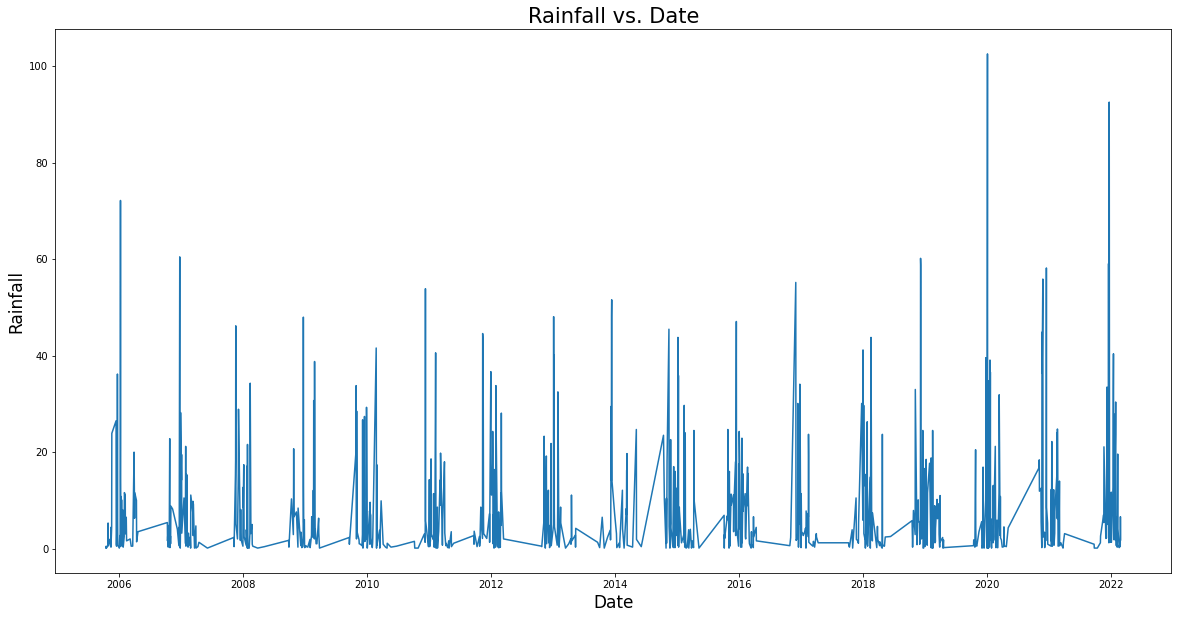

In [150]:
# Plot y_t versus t=`Date` and identify winter times
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(data['Date'].values, y_t)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Rainfall', fontsize=17)
plt.title('Rainfall vs. Date', fontsize=21)
plt.show()

It's easy to see at every year when there is rainfall (a bit before every x-tick and more after it). This makes sense as December to March are the Winter months in Israel.

$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n.
\label{eq:model} \tag{2}
$$

In [169]:
# illustrating fitted curve:
import statsmodels.api as sm

tt = np.arange(0, len(data))
x0 = np.ones(len(data))
x1 = np.cos(2 * np.pi * tt / 365)
x2 = np.sin(2 * np.pi * tt / 365)
Z = np.column_stack((x0, x1, x2))

model = sm.OLS(y_t, Z)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.210
Date:                Sat, 23 Apr 2022   Prob (F-statistic):              0.299
Time:                        00:49:52   Log-Likelihood:                -3532.5
No. Observations:                 911   AIC:                             7071.
Df Residuals:                     908   BIC:                             7085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0325      0.394     20.368      0.000       7.258       8.806
x1            -0.0828      0.549     -0.151      0.880      -1.160       0.995
x2             0.8628      0.557      1.548      0.122      -0.231       1.956
==============================================================================
Omnibus:                      579.927   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6068.467
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      14.318   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Traceback (most recent call last):
  File "_pydevd_bundle\pydevd_cython_win32_38_64.pyx", line 1034, in _pydevd_bundle.pydevd_cython_win32_38_64.PyDBFrame.trace_dispatch
  File "C:\Program Files\JetBrains\PyCharm 2021.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 144, in cmd_step_over
    if _is_inside_jupyter_cell(frame, pydb):
  File "C:\Program Files\JetBrains\PyCharm 2021.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 209, in _is_inside_jupyter_cell
    if is_cell_filename(filename):
  File "C:\Program Files\JetBrains\PyCharm 2021.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 220, in is_cell_filename
    ipython_shell = get_ipython()
NameError: name 'get_ipython' is not defined


In [165]:
y_pred = model.predict(results.params, Z)  # equivalent to y_pred = np.dot(beta_hat.T, Z)
plt.figure(figsize=(20, 10))
plt.plot(data['Date'].values, y_t)
plt.plot(data['Date'].values, y_pred)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Rainfall', fontsize=17)
plt.title('Rainfall vs. Date', fontsize=21)
plt.show()